In [34]:
! pip install pytrends

In [35]:
import pandas as pd
from pytrends.request import TrendReq

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [102]:
y = pd.read_csv('AAPL_quarterly_financials.csv')
y

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
1,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
2,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,\tSellingGeneralAndAdministration,"24,932,000,000","6,151,000,000","5,973,000,000","6,201,000,000","6,607,000,000","6,440,000,000","6,012,000,000","6,193,000,000","6,449,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,\tResearchAndDevelopment,"29,915,000,000","7,307,000,000","7,442,000,000","7,457,000,000","7,709,000,000","6,761,000,000","6,797,000,000","6,387,000,000","6,306,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,\tDepreciationAmortizationDepletionIncomeState...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,\t\tDepreciationAndAmortizationInIncomeStatement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,\tOtherOperatingExpenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
y.index = y.name

In [121]:
y = pd.DataFrame(y.loc['BasicEPS', :]).iloc[2:,:]

In [122]:
y.index = pd.to_datetime(y.index)

In [123]:
y.sort_index()

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


In [125]:
y_sorted = y.sort_index().fillna(0.)

y_sorted

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [103]:
import time

In [179]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ['iPhone', "Recession", 'Buy iPhone', 'Sell iPhone', 'New Iphone', 'Smart', 'Release', 'UCLA', "China", 'Begal']  
            
        # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    time.sleep(5)
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [180]:
df = df.resample('Q').mean()

df

,iPhone,Recession,Buy iPhone,Sell iPhone,New Iphone,Smart,Release,UCLA,China,Begal
date,,,,,,,,,,
2004-03-31,0.000000,7.333333,0.000000,0.333333,0.000000,48.333333,39.000000,86.666667,55.000000,5.666667
2004-06-30,0.000000,7.666667,0.333333,1.333333,0.000000,47.333333,39.000000,85.000000,60.000000,4.666667
2004-09-30,0.000000,6.000000,0.000000,0.000000,0.000000,47.333333,46.000000,75.333333,56.000000,4.666667
2004-12-31,0.000000,7.333333,0.333333,0.000000,0.000000,48.000000,44.000000,83.000000,59.000000,4.333333
2005-03-31,0.000000,6.000000,0.000000,0.666667,0.000000,47.333333,39.666667,81.666667,60.666667,3.666667
...,...,...,...,...,...,...,...,...,...,...
2023-03-31,49.333333,36.666667,27.000000,27.333333,22.666667,85.333333,79.666667,43.000000,39.333333,6.000000
2023-06-30,47.666667,29.000000,23.666667,24.333333,21.000000,78.666667,76.333333,29.000000,38.666667,5.333333
2023-09-30,56.666667,21.333333,31.666667,33.000000,31.000000,79.000000,92.000000,29.000000,39.000000,8.000000


In [181]:
X = df

X

,iPhone,Recession,Buy iPhone,Sell iPhone,New Iphone,Smart,Release,UCLA,China,Begal
date,,,,,,,,,,
2004-03-31,0.000000,7.333333,0.000000,0.333333,0.000000,48.333333,39.000000,86.666667,55.000000,5.666667
2004-06-30,0.000000,7.666667,0.333333,1.333333,0.000000,47.333333,39.000000,85.000000,60.000000,4.666667
2004-09-30,0.000000,6.000000,0.000000,0.000000,0.000000,47.333333,46.000000,75.333333,56.000000,4.666667
2004-12-31,0.000000,7.333333,0.333333,0.000000,0.000000,48.000000,44.000000,83.000000,59.000000,4.333333
2005-03-31,0.000000,6.000000,0.000000,0.666667,0.000000,47.333333,39.666667,81.666667,60.666667,3.666667
...,...,...,...,...,...,...,...,...,...,...
2023-03-31,49.333333,36.666667,27.000000,27.333333,22.666667,85.333333,79.666667,43.000000,39.333333,6.000000
2023-06-30,47.666667,29.000000,23.666667,24.333333,21.000000,78.666667,76.333333,29.000000,38.666667,5.333333
2023-09-30,56.666667,21.333333,31.666667,33.000000,31.000000,79.000000,92.000000,29.000000,39.000000,8.000000


# 2.) Normalize all the X data

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
scaler = StandardScaler()

In [184]:
y_sorted

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


In [185]:
result = pd.concat([X, y_sorted], axis=1)

result_new = result.dropna()

In [186]:
y_chosen_df = result_new.iloc[:, -1:]

X_df = result_new[result_new.columns[:-1]]

In [187]:
X_scaled = scaler.fit_transform(X_df)

X_scaled

array([[-1.82695674e+00, -7.61852624e-01, -1.76823530e+00,
        -1.48428315e+00, -1.63269634e+00, -6.96177300e-01,
        -1.38318305e+00,  2.02950006e+00,  1.44013935e+00,
        -3.72112185e-02],
       [-1.82695674e+00, -7.42015328e-01, -1.74921684e+00,
        -1.42300896e+00, -1.63269634e+00, -7.62280674e-01,
        -1.38318305e+00,  1.93003945e+00,  2.13669654e+00,
        -1.72889046e-01],
       [-1.82695674e+00, -8.41201810e-01, -1.76823530e+00,
        -1.50470788e+00, -1.63269634e+00, -7.62280674e-01,
        -8.21719706e-01,  1.35316791e+00,  1.57945078e+00,
        -1.72889046e-01],
       [-1.82695674e+00, -7.61852624e-01, -1.74921684e+00,
        -1.50470788e+00, -1.63269634e+00, -7.18211758e-01,
        -9.82137803e-01,  1.81068672e+00,  1.99738510e+00,
        -2.18114988e-01],
       [-1.82695674e+00, -8.41201810e-01, -1.76823530e+00,
        -1.46385842e+00, -1.63269634e+00, -7.62280674e-01,
        -1.32971035e+00,  1.73111823e+00,  2.22957083e+00,
        -3.

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [188]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [192]:
lasso = Lasso(alpha = 0.01)

In [193]:
lasso.fit(X_scaled, y_chosen_df)

Lasso(alpha=0.01)

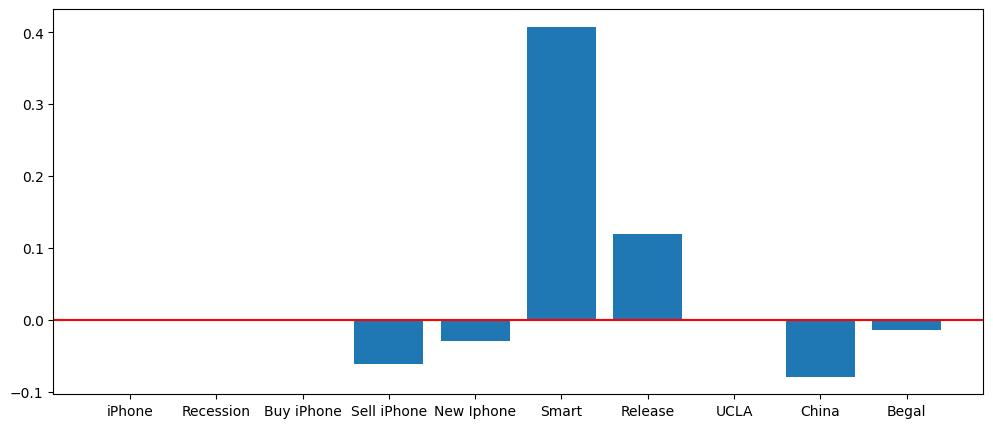

In [194]:
coefficients = lasso.coef_

# Now you can plot the coefficients
plt.figure(figsize=(12, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.axhline(0, color='r')
plt.xticks(range(len(coefficients)), X.columns)  # Assuming X is a DataFrame
plt.show()

# 5.) Do these coefficient magnitudes make sense?

With a lasso alpha = 0.01

iPhone: The coefficient for this predictor is very small and close to zero, suggesting that it has a negligible positive impact on earnings.(this do not makesnese, since I suppose to be a positive impact on earning

Recession: Similarly, the coefficient is very small, near zero, and this indicates that the Recession variable has an insignificant positive effect on earnings.

Buy iPhone: This bar is not visible, which implies that the coefficient is zero or very close to it. The Lasso regression has likely reduced this coefficient to zero, suggesting that buying iPhones does not contribute to the prediction of earnings in the presence of other variables.

Sell iPhone: The coefficient is also negative, showing negative impact on earnings. Which make sense, since customer selling iphone may spread negtative expectation on the value of the product.

New iPhone: There is a little visible bar in negative direction for this variable, indicating a zero or near-zero coefficient, suggesting no relationship with earnings after the Lasso regularization.

Smart: The bar is the tallest among all the variables, indicating a relatively strong positive impact on earnings. This suggests that the Smart variable is the most significant predictor and positively correlates with an increase in earnings. It makes sense.

Release: The coefficient is much smaller than Smart but still positive, showing a modest positive contribution to earnings.

UCLA: This coefficient is meant to have no impact on earning. This bar is not visible, suggesting that the UCLA variable's coefficient is zero or near-zero, indicating no association with earnings in the model.

China: This coefficient is meant to have no impact on earning. The coefficient is small and negative, indicating a slight negative effect on earnings. Probably due to the competitive nature between China and US.

Begal: This coefficient is meant to have no impact on earning, and the bar is not visible, indicating a coefficient of zero or near zero, meaning it does not have an impact on earnings in this model.

In [ ]:
# ---- 

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?